In [111]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)
import matplotlib.pyplot as plt

1.10.0


Download the IMDB dataset

In [64]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* Each example is an array of integers representing the words of the movie review.
* Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

In [8]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary.

In [58]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [103]:
train_data.shape, train_labels.shape

((25000, 256), (25000,))

In [104]:
test_data.shape, test_labels.shape

((25000, 256), (25000,))

* Movie reviews may be different lengths. 
* The below code shows the number of words in the first and second reviews. 
* Since inputs to a neural network must be the same length.

In [65]:
len(train_data[0]), len(train_data[1]), len(test_data[0]), len(test_data[1])

(218, 189, 68, 260)

Convert the integers back to words

In [20]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [79]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [92]:
reverse_word_index[4]

'the'

Now we can use the decode_review function to display the text for the first review:

In [27]:
decode_review(train_data[0]), train_labels[0]

("<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for w

In [29]:
decode_review(train_data[1]), train_labels[1]

("<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then",
 0)

##### Prepare the data
The reviews—the arrays of integers—must be converted to tensors before fed into the neural network. This conversion can be done a couple of ways:

One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix.

Alternatively, we can pad the arrays so they all have the same length, then create an integer tensor of shape num_examples * max_length. We can use an embedding layer capable of handling this shape as the first layer in our network.

In [101]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

In [102]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [97]:
len(train_data[0]), len(train_data[1]), len(test_data[0]), len(test_data[1])

(256, 256, 256, 256)

In [51]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


##### Build the Model
* The neural network is created by stacking layers—this requires two main architectural decisions:
* How many layers to use in the model?
* How many hidden units to use for each layer?

In [71]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


##### Loss function and optimizer
* A model needs a loss function and an optimizer for training
* A loss function, you could, for instance, choose mean_squared_error
* Generally, binary_crossentropy is better for dealing with probabilities
* binary_crossentropy, it measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and the predictions

In [73]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Create a validation set

* When training, we want to check the accuracy of the model on data it hasn't seen before. 
* Create a validation set by setting apart 10,000 examples from the original training data. 
* Why not use the testing set now? Our goal is to develop and tune our model using only the training data, 
* Use the test data just once to evaluate our accuracy

In [75]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

* Train the model for 20 epochs in mini-batches of 512 samples. 
* This is 20 iterations over all samples in the x_train and y_train tensors. 
* While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set:

In [77]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.1747 - acc: 0.9407 - val_loss: 0.2878 - val_acc: 0.8849
Epoch 2/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.1702 - acc: 0.9425 - val_loss: 0.2871 - val_acc: 0.8860
Epoch 3/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.1661 - acc: 0.9451 - val_loss: 0.2873 - val_acc: 0.8858
Epoch 4/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.1622 - acc: 0.9474 - val_loss: 0.2870 - val_acc: 0.8853
Epoch 5/40
15000/15000 [==============================] - 0s 24us/step - loss: 0.1588 - acc: 0.9484 - val_loss: 0.2867 - val_acc: 0.8865
Epoch 6/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.1547 - acc: 0.9503 - val_loss: 0.2880 - val_acc: 0.8842
Epoch 7/40
15000/15000 [==============================] - 0s 22us/step - loss: 0.1517 - acc: 0.9516 - val_loss: 0.2874 - val_acc

##### Evaluate the model

Two values will be returned. 
* Loss (a number which represents our error, lower values are better), 
* Accuracy.

In [115]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 0s 9us/step
[0.3621790923690796, 0.86928]


##### Create a graph of accuracy and loss over time

In [116]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

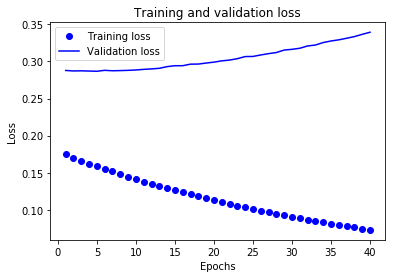

In [117]:
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* The dots represent the training loss and accuracy
* The solid lines are the validation loss and accuracy.
* Notice the training loss decreases with each epoch and the training accuracy increases with each epoch. 
* This is expected when using a gradient descent optimization—it should minimize the desired quantity on every iteration.

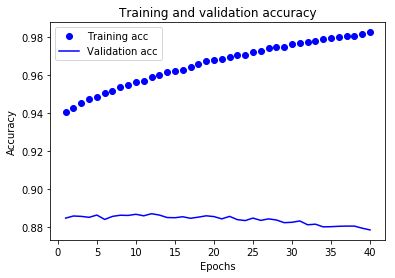

In [118]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. 
* This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before. 
* After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.
* For this particular case, we could prevent overfitting by simply stopping the training after twenty or so epochs. * Later, you'll see how to do this automatically with a callback.